In [1]:
import tensorflow as tf
import csv
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
import time

Using TensorFlow backend.


In [2]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
print(training_images.shape)
print(training_labels.shape)
print(test_images.shape)
print(test_labels.shape)
training_images = training_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)
print(training_images.shape)
print(test_images.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [3]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32, (3,3), input_shape=(28, 28, 1), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Conv2D(64, (3,3),padding='same', activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3),padding='same', activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(128, activation='relu'),
                            tf.keras.layers.Dense(10, activation='softmax')])

W0820 09:23:22.154752 139995335415680 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
model.compile(optimizer='Adagrad', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [5]:
start_time = time.time()
History = model.fit(training_images, training_labels, epochs=5, verbose=1, validation_split=0.2)
end_time = time.time()

Train on 48000 samples, validate on 12000 samples


W0820 09:23:22.621035 139995335415680 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/optimizer_v2/adagrad.py:105: calling Constant.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Epoch 1/5
48000/48000 [==============================] - 9s 195us/sample - loss: 0.8388 - acc: 0.7527 - val_loss: 0.2565 - val_acc: 0.9192
Epoch 2/5
48000/48000 [==============================] - 7s 150us/sample - loss: 0.3464 - acc: 0.8882 - val_loss: 0.1896 - val_acc: 0.9408
Epoch 3/5
48000/48000 [==============================] - 7s 150us/sample - loss: 0.2756 - acc: 0.9133 - val_loss: 0.1603 - val_acc: 0.9497
Epoch 4/5
48000/48000 [==============================] - 7s 150us/sample - loss: 0.2335 - acc: 0.9263 - val_loss: 0.1416 - val_acc: 0.9556
Epoch 5/5
48000/48000 [==============================] - 7s 149us/sample - loss: 0.2099 - acc: 0.9335 - val_loss: 0.1291 - val_acc: 0.9598


In [6]:
runtime = end_time-start_time
print(runtime)

39.50734901428223


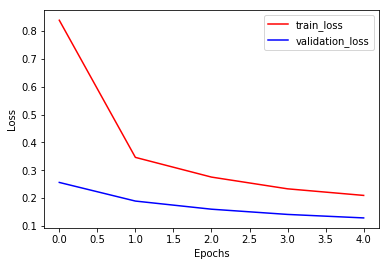

In [7]:
plt.plot(History.history['loss'],'r', label='train_loss')
plt.plot(History.history['val_loss'],'b', label='validation_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

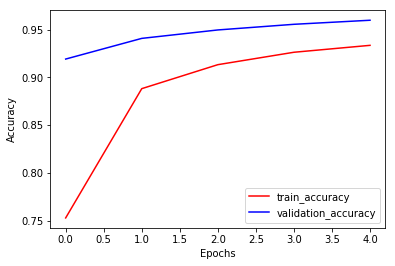

In [8]:
plt.plot(History.history['acc'],'r', label='train_accuracy')
plt.plot(History.history['val_acc'],'b', label='validation_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')